# Combine Walmart Data

## Install libraries

Uncomment the following code in install necessary libraries.

In [8]:
# !pip install pandas

## Import libraries

In [9]:
import pandas as pd

## Import data

In [10]:
calendar = pd.read_csv("../datasets/calendar.csv")
sales_train_dataset = pd.read_csv("../datasets/sales_train_dataset.csv")
sell_prices = pd.read_csv("../datasets/sell_prices.csv")

## Clean and merge data

In [11]:
calendar

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964,2016-06-15,11620,Wednesday,5,6,2016,d_1965,NaN,NaN,NaN,NaN,0,1,1
1965,2016-06-16,11620,Thursday,6,6,2016,d_1966,NaN,NaN,NaN,NaN,0,0,0
1966,2016-06-17,11620,Friday,7,6,2016,d_1967,NaN,NaN,NaN,NaN,0,0,0
1967,2016-06-18,11621,Saturday,1,6,2016,d_1968,NaN,NaN,NaN,NaN,0,0,0


In [12]:
sales_train_dataset

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,FOODS_3_823_WI_3_validation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,0,0,2,2,...,2,0,0,0,0,0,1,0,0,1
30486,FOODS_3_824_WI_3_validation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
30487,FOODS_3_825_WI_3_validation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,0,6,0,2,...,2,1,0,2,0,1,0,0,1,0
30488,FOODS_3_826_WI_3_validation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,1,0,0,1,0,3,1,3


In [13]:
sell_prices

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26
...,...,...,...,...
6841116,WI_3,FOODS_3_827,11617,1.00
6841117,WI_3,FOODS_3_827,11618,1.00
6841118,WI_3,FOODS_3_827,11619,1.00
6841119,WI_3,FOODS_3_827,11620,1.00


In [14]:
melted_sales_train_dataset = sales_train_dataset.melt(
    id_vars=["id", "item_id", "dept_id", "cat_id", "store_id", "state_id"],
    var_name="d",
    value_name="amount",
)

In [15]:
merged_calendar_sales_train_dataset = calendar.merge(
    melted_sales_train_dataset, on="d", how="inner"
)

In [16]:
merged_calendar_sales_train_dataset_sell_price = (
    merged_calendar_sales_train_dataset.merge(
        sell_prices, on=["store_id", "item_id", "wm_yr_wk"], how="left"
    )
)

In [17]:
merged_calendar_sales_train_dataset_sell_price_fillna = (
    merged_calendar_sales_train_dataset_sell_price["sell_price"].fillna(0.0)
)

In [18]:
merged_calendar_sales_train_dataset_sell_price["sell_price"] = (
    merged_calendar_sales_train_dataset_sell_price_fillna
)

In [19]:
merged_calendar_sales_train_dataset_sell_price["revenue"] = (
    merged_calendar_sales_train_dataset_sell_price["sell_price"]
    * merged_calendar_sales_train_dataset_sell_price["amount"]
).round(5)

In [20]:
sales_train_dataset_revenue_by_date_store = (
    merged_calendar_sales_train_dataset_sell_price.groupby(
        by=[
            "date",
            "d",
            "wm_yr_wk",
            "store_id",
        ]
    )["revenue"]
    .sum()
    .reset_index()
)

In [21]:
sales_train_dataset_revenue_by_date_store_full = calendar.merge(
    sales_train_dataset_revenue_by_date_store,
    on=["date", "d", "wm_yr_wk"],
    how="inner",
)

In [22]:
sales_train_dataset_revenue_by_date_store_full

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,store_id,revenue
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0,CA_1,10933.16
1,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0,CA_2,9101.52
2,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0,CA_3,11679.83
3,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0,CA_4,4561.59
4,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0,TX_1,6586.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19125,2016-04-24,11613,Sunday,2,4,2016,d_1913,NaN,NaN,NaN,NaN,0,0,0,TX_2,14696.53
19126,2016-04-24,11613,Sunday,2,4,2016,d_1913,NaN,NaN,NaN,NaN,0,0,0,TX_3,13903.61
19127,2016-04-24,11613,Sunday,2,4,2016,d_1913,NaN,NaN,NaN,NaN,0,0,0,WI_1,14858.97
19128,2016-04-24,11613,Sunday,2,4,2016,d_1913,NaN,NaN,NaN,NaN,0,0,0,WI_2,15066.13


In [26]:
revenue = sales_train_dataset_revenue_by_date_store_full["revenue"]

In [28]:
# revenue.hist()

In [35]:
sales_train_dataset_revenue_by_date_store_full["date"] = pd.to_datetime(
    sales_train_dataset_revenue_by_date_store_full["date"]
)

In [36]:
sales_train_dataset_revenue_by_date_store_full["date"].describe()

count                            19130
mean     2013-09-10 23:59:59.999999744
min                2011-01-29 00:00:00
25%                2012-05-21 00:00:00
50%                2013-09-11 00:00:00
75%                2015-01-02 00:00:00
max                2016-04-24 00:00:00
Name: date, dtype: object

In [45]:
sales_train_dataset_revenue_by_date_store_full["event_name_1"].value_counts()

event_name_1
SuperBowl              60
ValentinesDay          60
PresidentsDay          60
LentStart              60
LentWeek2              60
StPatricksDay          60
Purim End              60
Pesach End             50
MemorialDay            50
Mother's day           50
NBAFinalsStart         50
NBAFinalsEnd           50
Ramadan starts         50
IndependenceDay        50
NewYear                50
Thanksgiving           50
Eid al-Fitr            50
LaborDay               50
Halloween              50
ColumbusDay            50
EidAlAdha              50
VeteransDay            50
MartinLutherKingDay    50
OrthodoxChristmas      50
Christmas              50
Chanukah End           50
Easter                 50
Cinco De Mayo          40
OrthodoxEaster         40
Father's day           40
Name: count, dtype: int64

In [44]:
sales_train_dataset_revenue_by_date_store_full["event_name_2"].value_counts()

event_name_2
Easter            10
Cinco De Mayo     10
OrthodoxEaster    10
Father's day      10
Name: count, dtype: int64

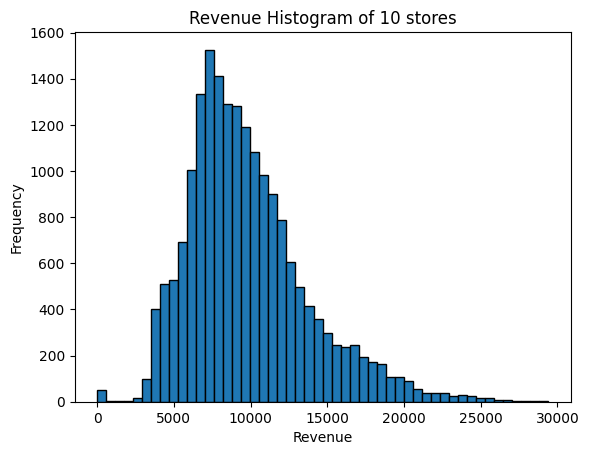

In [60]:
import matplotlib.pyplot as plt

sales_train_dataset_revenue_by_date_store_full["revenue"].plot(kind='hist', bins=50, edgecolor='black')
plt.title('Revenue Histogram of 10 stores')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

sales_train_dataset_revenue_by_date_store_full["revenue"].plot(kind='hist', bins=50, edgecolor='black')
plt.title('Revenue Histogramof 10 stores')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()

In [23]:
sales_train_dataset_revenue_by_date_store_full.to_csv(
    "sales_train_dataset_by_date_store.csv"
)